In [32]:
import pickle
from pathlib import Path
from easydict import EasyDict
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
cfgs, btests = [], []
for p in sorted(Path("optimization").glob("*.pickle")):
    cfg, btest = pickle.load(open(p, "rb"))
    cfgs.append(cfg)
    btests.append(btest)
    print(p)


In [34]:
opt_summary = {k:[] for k in cfgs[0].keys()}
for k in opt_summary.keys():
    for cfg in cfgs:
        v = cfg[k]
        if type(v) is EasyDict and "func" in v.keys():
            opt_summary[k].append(str(v.func.name))
        else:
            opt_summary[k].append(v)
            
opt_summary["btest"], opt_summary["ndeals"] = [], []
for btest in btests:
    opt_summary["btest"].append(btest.profits.sum())
    opt_summary["ndeals"].append(len(btest.profits))
    
opt_summary = pd.DataFrame(opt_summary)
opt_summary.sort_values(by=["btest"], ascending=False, inplace=True)
opt_summary = opt_summary[opt_summary.ticker != "NVTK"]
opt_summary.head(10)

,date_start,trailing_stop_rate,trailing_stop_type,body_classifier,stops_processor,wait_entry_point,hist_buffer_size,tstart,tend,period,ticker,data_type,save_plots,btest,ndeals
264,2013-01-01,0.02,1,trend:2,stops_fix:25-8,9999,30,0,None,M5,SBER,metatrader,False,419.155977,1718
318,2013-01-01,0.02,1,trend:3,stops_fix:25-4,9999,30,0,None,M5,SBER,metatrader,False,415.287005,1630
246,2013-01-01,0.02,1,trend:2,stops_fix:25-4,9999,30,0,None,M5,SBER,metatrader,False,394.600949,2074
30,2013-01-01,0.01,1,trend:2,stops_fix:25-4,9999,30,0,None,M5,SBER,metatrader,False,389.359744,1327
228,2013-01-01,0.02,1,trend:2,stops_fix:25-2,9999,30,0,None,M5,SBER,metatrader,False,388.392356,2588
102,2013-01-01,0.01,1,trend:3,stops_fix:25-4,9999,30,0,None,M5,SBER,metatrader,False,378.376691,1146
12,2013-01-01,0.01,1,trend:2,stops_fix:25-2,9999,30,0,None,M5,SBER,metatrader,False,361.645569,1758
443,2013-01-01,0.04,1,trend:2,stops_fix:25-2,9999,30,0,None,M15,GAZP,metatrader,False,358.033405,1468
84,2013-01-01,0.01,1,trend:3,stops_fix:25-2,9999,30,0,None,M5,SBER,metatrader,False,346.183750,1450
475,2013-01-01,0.04,1,trend:2,stops_fix:25-8,9999,30,0,None,M15,ROSN,metatrader,False,345.809233,1086


In [35]:
opt_res = {"param_set":[], "ticker":[], "btest":[], "ndeals":[], "test_ids":[]}
for i in range(opt_summary.shape[0]):
    exphash, test_ids = "", ""
    for col in opt_summary.columns:
        if col not in ["ticker", "btest", "ndeals"]:
            exphash += str(opt_summary[col].iloc[i]) + " "
    opt_res["test_ids"].append(f".{opt_summary.index[i]}")
    opt_res["param_set"].append(exphash)
    opt_res["ticker"].append(f".{opt_summary.ticker.iloc[i]}")
    opt_res["ndeals"].append(opt_summary.ndeals.iloc[i])
    opt_res["btest"].append(opt_summary.btest.iloc[i])

opt_res = pd.DataFrame(opt_res)
opt_res = opt_res.groupby(by="param_set").sum()
opt_res.sort_values(by=["btest"], ascending=False, inplace=True)
opt_res.head(20)

,ticker,btest,ndeals,test_ids
param_set,,,,
2013-01-01 0.01 1 trend:3 stops_fix:25-2 9999 30 0 None M5 metatrader False,.SBER.ROSN.GMKN.GAZP.LKOH,1222.774389,7036,.84.85.88.89.87
2013-01-01 0.04 1 trend:2 stops_fix:25-2 9999 30 0 None M15 metatrader False,.GAZP.SBER.ROSN.GMKN.LKOH,1170.450721,7537,.443.438.439.442.441
2013-01-01 0.01 1 trend:2 stops_fix:25-2 9999 30 0 None M5 metatrader False,.SBER.GAZP.ROSN.LKOH.GMKN,1165.765368,8430,.12.17.13.15.16
2013-01-01 0.04 1 trend:2 stops_fix:25-8 9999 30 0 None M15 metatrader False,.ROSN.GAZP.SBER.GMKN.LKOH,1105.860086,5226,.475.479.474.478.477
2013-01-01 0.01 1 trend:2 stops_dyn:False-True 9999 30 0 None M15 metatrader False,.SBER.GAZP.ROSN.GMKN.LKOH,1093.142194,5062,.60.65.61.64.63
2013-01-01 0.02 1 trend:2 stops_fix:25-2 9999 30 0 None M15 metatrader False,.GAZP.SBER.ROSN.GMKN.LKOH,1084.385300,5454,.227.222.223.226.225
2013-01-01 0.01 1 trend:3 stops_fix:25-8 9999 30 0 None M5 metatrader False,.SBER.GMKN.GAZP.ROSN.LKOH,1079.264695,4514,.120.124.125.121.123
2013-01-01 0.02 1 trend:2 stops_fix:25-4 9999 30 0 None M5 metatrader False,.SBER.GAZP.ROSN.LKOH.GMKN,1060.205444,10057,.246.251.247.249.250
2013-01-01 0.01 1 trend:2 stops_dyn:False-True 9999 30 0 None M5 metatrader False,.GAZP.SBER.ROSN.LKOH.GMKN,1058.710307,13843,.71.66.67.69.70


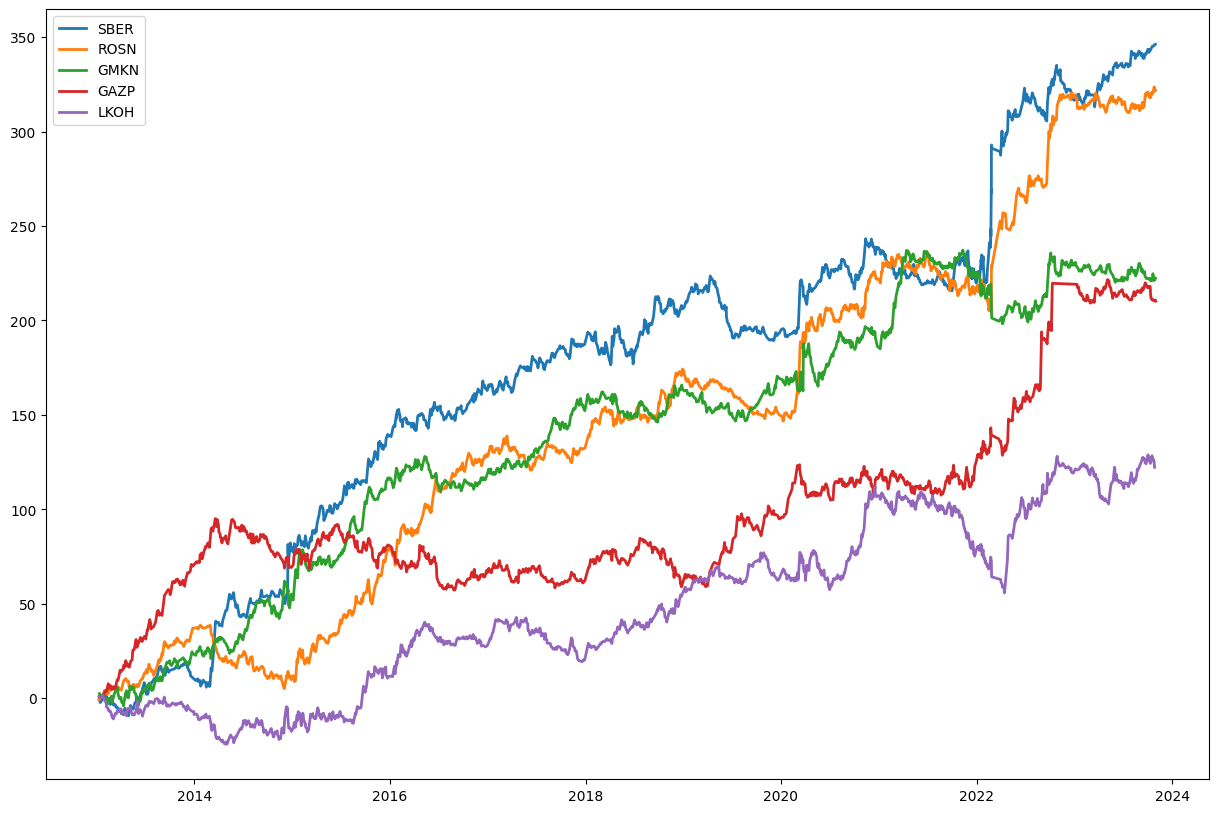

In [44]:
plt.figure(figsize=(15, 10))
opt_res_id = 0
legend = []
for test_id in map(int, opt_res.test_ids.iloc[opt_res_id].split(".")[1:]):
    plt.plot([pos.close_date for pos in btests[test_id].positions], 
             btests[test_id].profits.cumsum(), 
             linewidth=2)
    legend.append(cfgs[test_id].ticker)
plt.legend(legend)

In [18]:
opt_summary_loc = opt_summary[opt_summary.ticker == "ROSN"]
opt_summary_loc.head()

,trailing_stop_rate,trailing_stop_type,body_classifier,stops_processor,wait_entry_point,hist_buffer_size,tstart,tend,period,ticker,data_type,save_plots,btest,ndeals
475,0.04,1,trend:npairs=2,"stops_fix:tp=25,sl=8",9999,30,0,None,M15,ROSN,metatrader,False,352.311404,1094
67,0.01,1,trend:npairs=3,"stops_fix:tp=25,sl=2",9999,30,0,None,M5,ROSN,metatrader,False,318.463341,1410
391,0.02,1,trngl_comp:npairs=3,"stops_fix:tp=25,sl=2",9999,30,0,None,M5,ROSN,metatrader,False,309.361871,2274
283,0.02,1,trend:npairs=3,"stops_fix:tp=25,sl=2",9999,30,0,None,M5,ROSN,metatrader,False,299.720672,1886
457,0.04,1,trend:npairs=2,"stops_fix:tp=25,sl=4",9999,30,0,None,M15,ROSN,metatrader,False,296.919481,1284
